# Black Friday dataset EDA
> With particular focus on products & users connection

## System Init

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

from pprint import pprint

def in2eu(price:float) -> float:
    # Utility to convert indian money to euros
    value = 0.012
    return price * value

In [2]:
BASE_DATASET = "../../data/mlspec-blackfriday/dataset/raw"
os.makedirs(BASE_DATASET, exist_ok=True)

In [3]:
!gsutil cp -r gs://mlteam-ml-specialization-2021-blackfriday/dataset/raw/* $BASE_DATASET/

Copying gs://mlteam-ml-specialization-2021-blackfriday/dataset/raw/README.md...
Copying gs://mlteam-ml-specialization-2021-blackfriday/dataset/raw/test.csv...
Copying gs://mlteam-ml-specialization-2021-blackfriday/dataset/raw/train.csv...

Operation completed over 3 objects/33.5 MiB.                                     


In [4]:
df_train=pd.read_csv(os.path.join(BASE_DATASET, "train.csv"))
df_test=pd.read_csv(os.path.join(BASE_DATASET,"test.csv"))

print(f"df_train shape:{df_train.shape}")
print(f"df_test shape:{df_test.shape}")

df_train shape:(550068, 12)
df_test shape:(233599, 11)


In [5]:
df_train.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422


In [6]:
df_test.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN


-------
## **Training set** EDA

### Dataset general info

In [7]:
df = df_train

df["Purchase_eur"] = df["Purchase"].apply(in2eu)
print("Dataset columns/types:\n")
pprint([f"{c}  {t}" for c,t in zip(df.columns,df.dtypes)])
df.head(3)

Dataset columns/types:

['User_ID  int64',
 'Product_ID  object',
 'Gender  object',
 'Age  object',
 'Occupation  int64',
 'City_Category  object',
 'Stay_In_Current_City_Years  object',
 'Marital_Status  int64',
 'Product_Category_1  int64',
 'Product_Category_2  float64',
 'Product_Category_3  float64',
 'Purchase  int64',
 'Purchase_eur  float64']


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Purchase_eur
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,100.440
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,182.400
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422,17.064


**Insights:**
- There aren't rows duplicated
- Users products distribution:
    - 5891 unique users
    - 3631 unique products
        - Product category 1 is always present
    - Categories: 1, 2, 3 have 20, 17, 15 different sub-values
- The avg of a purchase is 9263 (108€) - [online converter](https://themoneyconverter.com/INR/EUR)
    - max of the purchases is 23961 (279€)
    - min of the purchases is 12 (0.14€)

In [8]:
print(">Empty columns distribution:")
pprint(df.isnull().sum())

print("---\n>Rows unique values:")
pprint(df.nunique())

rows_dup = df.duplicated().sum()
print(f"---\n>Rows duplicated: {rows_dup}")

print("---\n>Purchases distribution:")
pprint(df['Purchase'].describe())

>Empty columns distribution:
User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
Purchase_eur                       0
dtype: int64
---
>Rows unique values:
User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
Purchase_eur        

In [9]:
df_subset = df.sample(n=5000, random_state=42) # https://altair-viz.github.io/user_guide/faq.html#maxrowserror-how-can-i-plot-large-datasets

indian_chart = alt.Chart(df_subset).transform_density(
    'Purchase',
    as_=['Purchase', 'density'],
).mark_area().encode(
    x="Purchase:Q",
    y='density:Q',
)

eu_chart = alt.Chart(df_subset).transform_density(
    'Purchase_eur',
    as_=['Purchase_eur', 'density'],
).mark_area().encode(
    x="Purchase_eur:Q",
    y='density:Q',
)

indian_chart | eu_chart

alt.HConcatChart(...)

----
## Explore the users purchases

**Insights:**
- On average a user buy 93 products (with standard deviation of 107)

>Number of total users:5891
      User_ID  N_Purchases
0     1001680         1026
1     1004277          979
2     1001941          898
3     1001181          862
4     1000889          823
...       ...          ...
5886  1005391            7
5887  1002690            7
5888  1002111            7
5889  1005608            7
5890  1000708            6

[5891 rows x 2 columns]
---
>users_purchases_avg: 93.37 | users_purchases_std:107.19
>n_purchases_over100: 1719 (29.18%)
>n_purchases_over50: 3080 (52.28%)
>n_purchases_over30: 4052 (68.78%)
>n_purchases_over10: 5818 (98.76%)
>n_purchases_less10: (1.24%)
---


Text(0.5, 0.98, 'Number of purchases distribution - x: number of products purchased, y: number of users buyed X products')

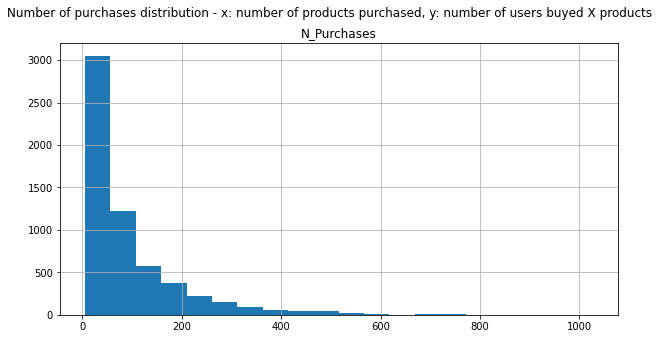

In [10]:
df_users = df.User_ID.value_counts().rename_axis('User_ID').reset_index(name='N_Purchases')
print(f">Number of total users:{df_users.shape[0]}")
print(df_users)
print("---")

usrs_purchases_avg = df_users.N_Purchases.mean()
usrs_purchases_std = df_users.N_Purchases.std()
n_purchases_over100 = df_users.N_Purchases[df_users.N_Purchases > 100].count()
n_purchases_over50 = df_users.N_Purchases[df_users.N_Purchases > 50].count()
n_purchases_over30 = df_users.N_Purchases[df_users.N_Purchases > 30].count()
n_purchases_over10 = df_users.N_Purchases[df_users.N_Purchases > 10].count()

print(f">users_purchases_avg: {usrs_purchases_avg:.2f} | users_purchases_std:{usrs_purchases_std:.2f}")
print(f">n_purchases_over100: {n_purchases_over100} ({n_purchases_over100/len(df_users)*100:.2f}%)")
print(f">n_purchases_over50: {n_purchases_over50} ({n_purchases_over50/len(df_users)*100:.2f}%)")
print(f">n_purchases_over30: {n_purchases_over30} ({n_purchases_over30/len(df_users)*100:.2f}%)")
print(f">n_purchases_over10: {n_purchases_over10} ({n_purchases_over10/len(df_users)*100:.2f}%)")
print(f">n_purchases_less10: ({(1-(n_purchases_over10/len(df_users)))*100:.2f}%)")
print("---")

import pylab as pl
df_users.hist(column="N_Purchases", 
              figsize=(10,5),
              bins=20
             )
pl.suptitle("Number of purchases distribution - x: number of products purchased, y: number of users buyed X products") # TODO reformat

## Explore the product categories

**Insights**
- Same product could be present with different prices:
    - On average, each product is sold with 2370.84 (28.45€) price variance
    - HP: For this reason old competitions try to predict the product price, maybe the price variance is due from user characteristics

In [11]:
df_prod_stats = df[["Product_ID","Purchase"]].groupby("Product_ID", as_index=False).std()
purchases_std_mean = df_prod_stats["Purchase"].mean()
print(f"purchases_std_mean:{purchases_std_mean:.3f} - {in2eu(purchases_std_mean):.2f}€")


purchases_std_mean:2370.848 - 28.45€


**Questions:**
- [?] Why Category 1 always present?

**Insights:**
- The same product is described with the same categories (Product_Category_\[1,2,3\]) on each entry
- There aren't rows with _Product_Category_1_ equal to 0 (zero)

In [12]:
df = df.fillna(0)

for col_name in ["Product_Category_1", "Product_Category_2", "Product_Category_3"]:
    print(f"Unique values of {col_name}")
    print(list(df[col_name].unique()))
    print("---")
    
print("Casting everything to integer...")
for col_name in ["Product_Category_1", "Product_Category_2", "Product_Category_3"]:
    df[col_name] = df[col_name].astype(int)

print("Creating category surrogate column...")
df["cat_surrogate"] = df["Product_Category_1"].apply(str) + "_" + df["Product_Category_2"].apply(str) + "_" + df["Product_Category_3"].apply(str)
df.head(3)

Unique values of Product_Category_1
[3, 1, 12, 8, 5, 4, 2, 6, 14, 11, 13, 15, 7, 16, 18, 10, 17, 9, 20, 19]
---
Unique values of Product_Category_2
[0.0, 6.0, 14.0, 2.0, 8.0, 15.0, 16.0, 11.0, 5.0, 3.0, 4.0, 12.0, 9.0, 10.0, 17.0, 13.0, 7.0, 18.0]
---
Unique values of Product_Category_3
[0.0, 14.0, 17.0, 5.0, 4.0, 16.0, 15.0, 8.0, 9.0, 13.0, 6.0, 12.0, 3.0, 18.0, 11.0, 10.0]
---
Casting everything to integer...
Creating category surrogate column...


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Purchase_eur,cat_surrogate
0,1000001,P00069042,F,0-17,10,A,2,0,3,0,0,8370,100.440,3_0_0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200,182.400,1_6_14
2,1000001,P00087842,F,0-17,10,A,2,0,12,0,0,1422,17.064,12_0_0


In [13]:
unique_products = df["Product_ID"].nunique()
unique_categories = df["cat_surrogate"].nunique()
print(f"unique_products:{unique_products}, unique_categories:{unique_categories}")

unique_products:3631, unique_categories:237


In [14]:
df_prod_stats = df[["Product_ID", "cat_surrogate"]].groupby("Product_ID").agg(["count", "nunique"]).reset_index()
df_prod_stats.columns = list(map('_'.join, df_prod_stats.columns.values))
df_prod_stats = df_prod_stats.rename(columns={"Product_ID_":"Product_ID"})
df_prod_stats.head()

,Product_ID,cat_surrogate_count,cat_surrogate_nunique
0,P00000142,1152,1
1,P00000242,376,1
2,P00000342,244,1
3,P00000442,92,1
4,P00000542,149,1


In [15]:
df_products_diff_spec = df_prod_stats[df_prod_stats["cat_surrogate_nunique"] != 1]
print(f"Number of products represented with differents categories: {len(df_products_diff_spec)}")
print(f"Entries with Product_Category_1 equal to zero: {len(df[df.Product_Category_1 == 0])}")

Number of products represented with differents categories: 0
Entries with Product_Category_1 equal to zero: 0


------

# Explore **test** set

**Insights:**
- Test set is composed by 3_491 products for 233_599 entries
- Test set is composed by 46 products never saw on train set
    - Those products are present on 61 entries of the test set

In [16]:
print(f"df_train shape:{df_train.shape}")
print(f"df_test shape:{df_test.shape}")

train_products = set(df_train["Product_ID"].unique())
test_products = set(df_test["Product_ID"].unique())

not_saw_products = test_products - train_products
not_saw_entries = df_test[df_test["Product_ID"].isin(not_saw_products)]

print(f"Unique products on train set:{len(train_products)}")
print(f"Unique products on test set:{len(test_products)}")
print(f"> Products on test but not on train:{len(not_saw_products)}")
print(f"> Rows on test with Product_ID not present on test set:{len(not_saw_entries)}")

df_train shape:(550068, 13)
df_test shape:(233599, 11)
Unique products on train set:3631
Unique products on test set:3491
> Products on test but not on train:46
> Rows on test with Product_ID not present on test set:61


----
# Facet analysis

In [16]:
!pip -q install facets-overview

## Train dataset

In [17]:
len(df_train)

550068

In [18]:
df_test = df.sample(3000)

**Note**
- Comment / uncomment the following cell because facet looks like cannot handle two graphs in one notebook

In [19]:
df = df_joined.copy()

user_features = ["Gender", 
                 "Age", 
                 "Occupation", 
                 "City_Category", 
                 "Stay_In_Current_City_Years",
                 "Marital_Status"
                ]
df["user_surrogate"] = ""

for feature in user_features:
    df["user_surrogate"] = df["user_surrogate"] + "_"+ df[feature].astype(str)
    df = df.drop(columns=[feature])    
df.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Purchase_eur,cat_surrogate
95720,1002826,P00370142,M,36-45,12,A,4+,1,16,0,0,12169,146.028,16_0_0
285631,1001958,P00259142,F,26-35,1,B,3,0,5,0,0,8882,106.584,5_0_0
64256,1003842,P00205842,F,36-45,16,B,4+,0,5,0,0,8730,104.760,5_0_0
151817,1005466,P00205942,M,26-35,12,B,1,0,5,8,14,5257,63.084,5_8_14
540960,1005310,P00115942,F,55+,1,C,3,0,8,17,0,8122,97.464,8_17_0


In [58]:
df_test = df.sample(3000)

In [20]:
# Display the Dive visualization for the training data.
from IPython.core.display import display, HTML

jsonstr = df_test.to_json(orient='records')
HTML_TEMPLATE = """
        <script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
        <link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/facets-dist/facets-jupyter.html">
        <facets-dive id="elem" height="600"></facets-dive>
        <script>
          var data = {jsonstr};
          document.querySelector("#elem").data = data;
        </script>"""
html = HTML_TEMPLATE.format(jsonstr=jsonstr)
display(HTML(html))